# **Business Understanding**

**Project Description**

Final Project ini memiliki tujuan yaitu untuk memprediksi apakah customer akan menggunakan layanan lagi atau tidak pada suatu perusahaan e-commerce. Proyek ini akan menghasilkan model yang penting untuk dapat mengidentifikasi customer yang berhenti menggunakan layanan sehingga dapat mengurangi resiko bisnis dan membantu dalam pembuat keputusan menyusun strategi penjualan.

**Manfaat**

- Meningkatkan keputusan strategi penjualan dengan bantuan model prediksi, menghindari kerugian dari hilangnya loyalitas customer.
- Efisiensi operasional dengan memanfaatkan model prediksi, sehingga berfokus pada customer yang tepat.


**Tantangan**

- Ukuran data yang besar (4.33 Gb data uncompressed)
- Merge dataset
- Dealing dengan missing data
- Imbalanced datasets

**Dataset**

Terdapat 3 dataset yang digunakan untuk mengerjakan proyek.
- **customer.csv**

  File ini berisi data dari pelanggan seperti nama, email, data demografi, hingga device yang dimiliki.

- **product.csv**

  Dataset product berisi informasi tentang produk yang dijual, seperti nama, kategori, harga, dan warna.

- **transactions.csv**

  File ini memuat data transaksi yang dilakukan pelanggan seperti produk yang dibeli, total harga, tujuan alamat, hingga metode pembayaran. Dataset ini memberikan informasi tentang riwayat transaksi dari pelanggan.

- **click_stream**

  File ini berisi data kumpulan data yang berisi informasi tentang halaman web yang dikunjungi oleh pelanggan seperti, waktu, traffic yang digunakan dan aktivitas yang dilakukan

# **Exploratory Data Analysis (EDA)**

## Import Package

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import json

##Data Collection (Load Data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/dataset/customer.csv')
product = pd.read_csv('/content/drive/MyDrive/dataset/product.csv',error_bad_lines=False)
transactions = pd.read_csv('/content/drive/MyDrive/dataset/transactions.csv')
stream = pd.read_csv('/content/drive/MyDrive/dataset/click_stream.csv')

<ipython-input-3-7503e4481794>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  product = pd.read_csv('/content/drive/MyDrive/dataset/product.csv',error_bad_lines=False)
Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11
Skipping line 33020:

##Data Preparation

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


###Merge Datasets

In [ ]:
# Melakukan merge antara transactions - customer - click_stream dengan left join
df = (transactions.merge(customer, how='left', on='customer_id')).merge(stream, how='left', on='session_id')

In [ ]:
# Mengganti kutip tunggal dengan kutip ganda
df['product_metadata'] = df['product_metadata'].str.replace("'", '"')

In [ ]:
# Apply json pada kolom product_metadata
df['product_metadata'] = df['product_metadata'].apply(json.loads)

In [ ]:
# Extrack product metadata
df['product_id'] = df['product_metadata'].apply(lambda x: [item['product_id'] for item in x])
df['quantity'] = df['product_metadata'].apply(lambda x: [item['quantity'] for item in x])
df['item_price'] = df['product_metadata'].apply(lambda x: [item['item_price'] for item in x])

#drop product_metadata
df.drop(columns='product_metadata', inplace=True)

In [ ]:
# Extrack event metadata untuk search keyword
df['search_keywords'] = df['event_metadata'].apply(lambda x: json.loads(x.replace("'", "\"")).get('search_keywords') if isinstance(x, str) and 'search_keywords' in json.loads(x.replace("'", "\"")) else np.nan)

#drop product_metadata
df.drop(columns='event_metadata', inplace=True)

In [ ]:
#Explode kolom yang berisi list menjadi baris baru
df = df.explode(['product_id', 'quantity', 'item_price'], ignore_index=True)

In [ ]:
# Melakukan merge antara df dan product dengan left join
data = df.merge(product, left_on='product_id', right_on='id', how='left')

In [ ]:
# Menampilkan Dataframe
data

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,id,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,54728.0,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
1,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,54728.0,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
2,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,54728.0,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
3,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,54728.0,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
4,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,54728.0,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20759559,2019-12-19T12:47:14.701215Z,58180,b242e188-5f94-4448-a038-c5865842374b,5e3183df-198b-40e0-b861-27ef694a832a,Gopay,Success,4724,BUYMORE,10000,2019-12-23T06:02:05.828334Z,...,47433.0,Women,Accessories,Bags,Handbags,Brown,Summer,2012.0,Casual,Baggit Women Brown Handbag
20759560,2019-12-19T12:47:14.701215Z,58180,b242e188-5f94-4448-a038-c5865842374b,5e3183df-198b-40e0-b861-27ef694a832a,Gopay,Success,4724,BUYMORE,10000,2019-12-23T06:02:05.828334Z,...,47433.0,Women,Accessories,Bags,Handbags,Brown,Summer,2012.0,Casual,Baggit Women Brown Handbag
20759561,2019-12-19T12:47:14.701215Z,58180,b242e188-5f94-4448-a038-c5865842374b,5e3183df-198b-40e0-b861-27ef694a832a,Gopay,Success,4724,BUYMORE,10000,2019-12-23T06:02:05.828334Z,...,47433.0,Women,Accessories,Bags,Handbags,Brown,Summer,2012.0,Casual,Baggit Women Brown Handbag
20759562,2019-12-19T12:47:14.701215Z,58180,b242e188-5f94-4448-a038-c5865842374b,5e3183df-198b-40e0-b861-27ef694a832a,Gopay,Success,4724,BUYMORE,10000,2019-12-23T06:02:05.828334Z,...,47433.0,Women,Accessories,Bags,Handbags,Brown,Summer,2012.0,Casual,Baggit Women Brown Handbag


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20759564 entries, 0 to 20759563
Data columns (total 45 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   created_at              object 
 1   customer_id             int64  
 2   booking_id              object 
 3   session_id              object 
 4   payment_method          object 
 5   payment_status          object 
 6   promo_amount            int64  
 7   promo_code              object 
 8   shipment_fee            int64  
 9   shipment_date_limit     object 
 10  shipment_location_lat   float64
 11  shipment_location_long  float64
 12  total_amount            int64  
 13  first_name              object 
 14  last_name               object 
 15  username                object 
 16  email                   object 
 17  gender_x                object 
 18  birthdate               object 
 19  device_type             object 
 20  device_id               object 
 21  device_version          objec

###Feature Engginering

####Convert Datetime

In [ ]:
# Mengubah kolom event_time dan shipment_date_limit menjadi tipe data datetime
data['event_time'] = pd.to_datetime(data['event_time'])
data['shipment_date_limit'] = pd.to_datetime(data['shipment_date_limit'])

In [ ]:
# Mengubah format menjadi tahun - bulan - tanggal
data['event_time'] = data['event_time'].dt.strftime('%Y-%m-%d')
data['shipment_date_limit'] = data['shipment_date_limit'].dt.strftime('%Y-%m-%d')

In [ ]:
# Mengubah kolom event_time dan shipment_date_limit menjadi tipe data datetime
data['event_time'] = pd.to_datetime(data['event_time'])
data['shipment_date_limit'] = pd.to_datetime(data['shipment_date_limit'])

####Fitur Churn

In [ ]:
# Mengindeks DataFrame berdasarkan kolom 'Tanggal' dan menyaring baris sebelum tanggal tertentu
cut_date = pd.to_datetime('2021-08-01')
data = data[data['event_time'] >= cut_date]

In [ ]:
# Descriptive statistic dari kolom event_time
data['event_time'].describe()

<ipython-input-22-6904d059edde>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['event_time'].describe()


count                 7794507
unique                    366
top       2022-05-29 00:00:00
freq                    28838
first     2021-08-01 00:00:00
last      2022-08-01 00:00:00
Name: event_time, dtype: object

In [ ]:
# Menghitung waktu 3 bulan sejak batas waktu tertentu
cutoff_date = pd.to_datetime('2022-08-01')
month_ago = cutoff_date - pd.DateOffset(months=3)

In [ ]:
# Membuat kolom 'churn' berdasarkan kondisi
data['churn'] = (data['event_time'] <= month_ago).astype(int)

<ipython-input-16-31d56b8f9335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['churn'] = (data['event_time'] <= month_ago).astype(int)


In [ ]:
# Menampilkan jumlah value dari kolom 'churn'
data[['churn']].value_counts()

churn
1        5699952
0        2094555
dtype: int64

#### Fitur age

In [ ]:
# Mengonversi kolom 'birthdate' menjadi objek datetime
data['birthdate'] = pd.to_datetime(data['birthdate'])

In [ ]:
# Menghitung umur dan membuat kolom baru 'age'
current_date = datetime.now()
data['age'] = current_date.year - data['birthdate'].dt.year

data.drop(columns='birthdate', inplace=True)

#### Fitur age_join

In [ ]:
# Mengonversi kolom 'first_join_date' menjadi objek datetime
data['first_join_date'] = pd.to_datetime(data['first_join_date'])

In [ ]:
# Menghitung waktu pertama join dan membuat kolom baru 'age_join'
current_date = datetime.now()
data['age_join'] = current_date.year - data['first_join_date'].dt.year

data.drop(columns='first_join_date', inplace=True)

#### Search Keyword

In [ ]:
# Menampilkan jumlah value dari kolom 'search_keyword'
data['search_keywords'].value_counts()

Dress Kondangan    147887
Tas Wanita          73814
Bekas               64894
T-Shirt             59155
Baju                48559
Kaos                48366
Dress Pesta         44861
Sepatu Nike         29350
Tas Kerja           22684
Thrift              16564
Second              16470
Second Hand         16461
Barang Bekas        16340
Celana Panjang      16267
Sepatu              16027
Sepatu Adidas       15117
Sendal               7399
Celana               7111
Jam                  4393
T-shirt              4369
Topi                 3062
Baju Tidur           1402
Daster                742
Name: search_keywords, dtype: int64

In [ ]:
# Mengganti value NaN dengan value 'tidak melakukan search' dalam kolom search_keyword
data['search_keywords'].fillna("tidak melakukan search", inplace=True)

In [ ]:
# Mengganti nilai selain 'tidak melakukan search' dengan 'melakukan search' dalam kolom 'search_keywords'
data['search_keywords'] = data['search_keywords'].apply(lambda x: 'melakukan search' if x != 'tidak melakukan search' else x)

In [ ]:
# Menampilkan jumlah value dari kolom 'search_keyword'
data['search_keywords'].value_counts()

tidak melakukan search    7113213
melakukan search           681294
Name: search_keywords, dtype: int64

#### Promo Code

In [ ]:
# Menampilkan jumlah value dari kolom 'promo_code'
data['promo_code'].value_counts()

AZ2022           792582
BUYMORE          606260
WEEKENDSERU      535614
XX2022           405989
LIBURDONG        186313
WEEKENDMANTAP    175167
STARTUP          104555
SC2022           102823
Name: promo_code, dtype: int64

In [ ]:
# Mengganti value NaN dengan value 'tidak melakukan search' dalam kolom search_keyword
data['promo_code'].fillna("tidak menggunakan promo code", inplace=True)

In [ ]:
# Mengganti nilai selain 'tidak menggunakan promo code' dengan 'menggunakan promo' dalam kolom 'promo_code'
data['promo_code'] = data['promo_code'].apply(lambda x: 'menggunakan promo' if x != 'tidak menggunakan promo code' else x)

In [ ]:
# Menampilkan jumlah value dari kolom 'promo_code'
data['promo_code'].value_counts()

tidak menggunakan promo code    4885204
menggunakan promo               2909303
Name: promo_code, dtype: int64

#### Payment Methode

In [ ]:
# Menampilkan jumlah value dari kolom 'payment_method'
data['payment_method'].value_counts()

Credit Card    2709919
Gopay          1569494
OVO            1565996
Debit Card     1266088
LinkAja         683010
Name: payment_method, dtype: int64

In [ ]:
# Mengganti beberapa value menjadi 'Dompet Digital'
data['payment_method'] = data['payment_method'].replace({'Gopay': 'Dompet digital', 'OVO': 'Dompet digital', 'LinkAja': 'Dompet digital'})

In [ ]:
# Menampilkan jumlah value dari kolom 'payment_method'
data['payment_method'].value_counts()

Dompet digital    3818500
Credit Card       2709919
Debit Card        1266088
Name: payment_method, dtype: int64

#### Provinsi

In [ ]:
# Mengelompokan lokasi tempat tinggal customer menjadi 3 provinsi
data['provinsi'] = data['home_location'].replace({
    'Jakarta Raya': 'Barat', 'Jawa Barat': 'Barat', 'Jawa Tengah': 'Barat', 'Yogyakarta': 'Barat', 'Jawa Timur': 'Barat',
    'Lampung': 'Barat', 'Sumatera Barat': 'Barat', 'Sumatera Utara': 'Barat', 'Riau': 'Barat', 'Bengkulu': 'Barat', 'Banten': 'Tengah', 'Jambi': 'Tengah',
    'Bangka Belitung': 'Barat', 'Aceh': 'Barat', 'Kepulauan Riau': 'Timur', 'Sumatera Selatan': 'Barat',

    'Kalimantan Barat': 'Tengah', 'Kalimantan Tengah': 'Tengah', 'Kalimantan Selatan': 'Tengah', 'Kalimantan Timur': 'Tengah',
    'Sulawesi Utara': 'Tengah', 'Sulawesi Barat': 'Tengah', 'Sulawesi Tengah': 'Tengah', 'Sulawesi Tenggara': 'Tengah', 'Bali': 'Tengah',
    'Gorontalo': 'Tengah', 'Sulawesi Selatan': 'Tengah',

    'Maluku': 'Timur',   'Nusa Tenggara Barat': 'Timur', 'Papua': 'Timur', 'Papua Barat': 'Timur',  'Nusa Tenggara Timur': 'Timur', 'Maluku Utara': 'Timur'
})

In [ ]:
# Menampilkan jumlah value dari kolom 'provinsi'
data['provinsi'].value_counts()

Barat     5373448
Tengah    1768358
Timur      652701
Name: provinsi, dtype: int64

#### Hapus kolom yang tidak diperlukan

In [ ]:
# Membuat list kolom yang akan dihapus
kolom_yang_dihapus = ['created_at', 'username', 'device_id', 'device_version', 'home_country', 'event_id', 'id','booking_id', 'email', 'last_name', 'first_name', 'productDisplayName', 'customer_id', 'session_id',
                      'shipment_location_long', 'shipment_location_lat', 'home_location_long', 'home_location_lat', 'product_id', 'subCategory', 'articleType', 'baseColour']
data = data.drop(kolom_yang_dihapus, axis=1)

In [ ]:
data.shape

(7794507, 25)

#### Mengubah tipe data

In [ ]:
# Mengubah tipe data pada kolom quantity dan item_price menjadi int64
data['quantity'] = data['quantity'].astype(int)
data['item_price'] = data['item_price'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7794507 entries, 539 to 20759545
Data columns (total 25 columns):
 #   Column               Dtype         
---  ------               -----         
 0   payment_method       object        
 1   payment_status       object        
 2   promo_amount         int64         
 3   promo_code           object        
 4   shipment_fee         int64         
 5   shipment_date_limit  datetime64[ns]
 6   total_amount         int64         
 7   gender_x             object        
 8   device_type          object        
 9   home_location        object        
 10  event_name           object        
 11  event_time           datetime64[ns]
 12  traffic_source       object        
 13  quantity             int64         
 14  item_price           int64         
 15  search_keywords      object        
 16  gender_y             object        
 17  masterCategory       object        
 18  season               object        
 19  year              

### Missing Value

In [ ]:
# Cek missing value (>0%)
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','total_missing_value']
data_missing_value['percentage'] = round((data_missing_value['total_missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,total_missing_value,percentage
0,usage,60306,0.77
1,season,7993,0.10
2,year,4284,0.05
3,masterCategory,4169,0.05
4,gender_y,4169,0.05


Terdapat 5 kolom yang memiliki missing value

Handling missing value:

*   Apabila data numeric, missing value bisa diisi dengan mean atau median, tergantung dengan skew nya
*   Apabila data categoric, missing value bisa diisi dengan modus




In [ ]:
# Mengisi missing value pada data Categoric
col_object = data.select_dtypes(include = ["object"]).columns
for col in col_object :
  data[col] = data[col].fillna(data[col].mode().iloc[0])

In [ ]:
# Mengisi missing value pada data numerik
col_numeric = data.select_dtypes(exclude=["object", "datetime64"]).columns
for i in col_numeric :
  if data[i].skew() > 0:
    data[i] = data[i].fillna(data[i].mean())
  else :
    data[i] = data[i].fillna(data[i].median())

In [ ]:
# Mengecek ulang missing value
data.isnull().sum()

payment_method         0
payment_status         0
promo_amount           0
promo_code             0
shipment_fee           0
shipment_date_limit    0
total_amount           0
gender_x               0
device_type            0
home_location          0
event_name             0
event_time             0
traffic_source         0
quantity               0
item_price             0
search_keywords        0
gender_y               0
masterCategory         0
season                 0
year                   0
usage                  0
churn                  0
age                    0
age_join               0
provinsi               0
dtype: int64

In [ ]:
data.shape

(7794507, 24)

### Duplicate

In [ ]:
# Cek duplikat data
data.duplicated().sum()

2946419

Terdapat 2946419 baris yang terindikasi duplikat, sehingga baris tersebut bisa didrop (dihapus)

In [ ]:
# Drop data yang terindikasi duplikat
data = data.drop_duplicates()

In [ ]:
# Recheck duplikat data
data.duplicated().sum()

0

In [ ]:
data.shape

(4848088, 25)

In [ ]:
# Mengubah tipe data kolom 'year'
data['year'] = data['year'].astype(int)

<ipython-input-33-fa8e5aec4fc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['year'].astype(int)


### Outlier

<Axes: >

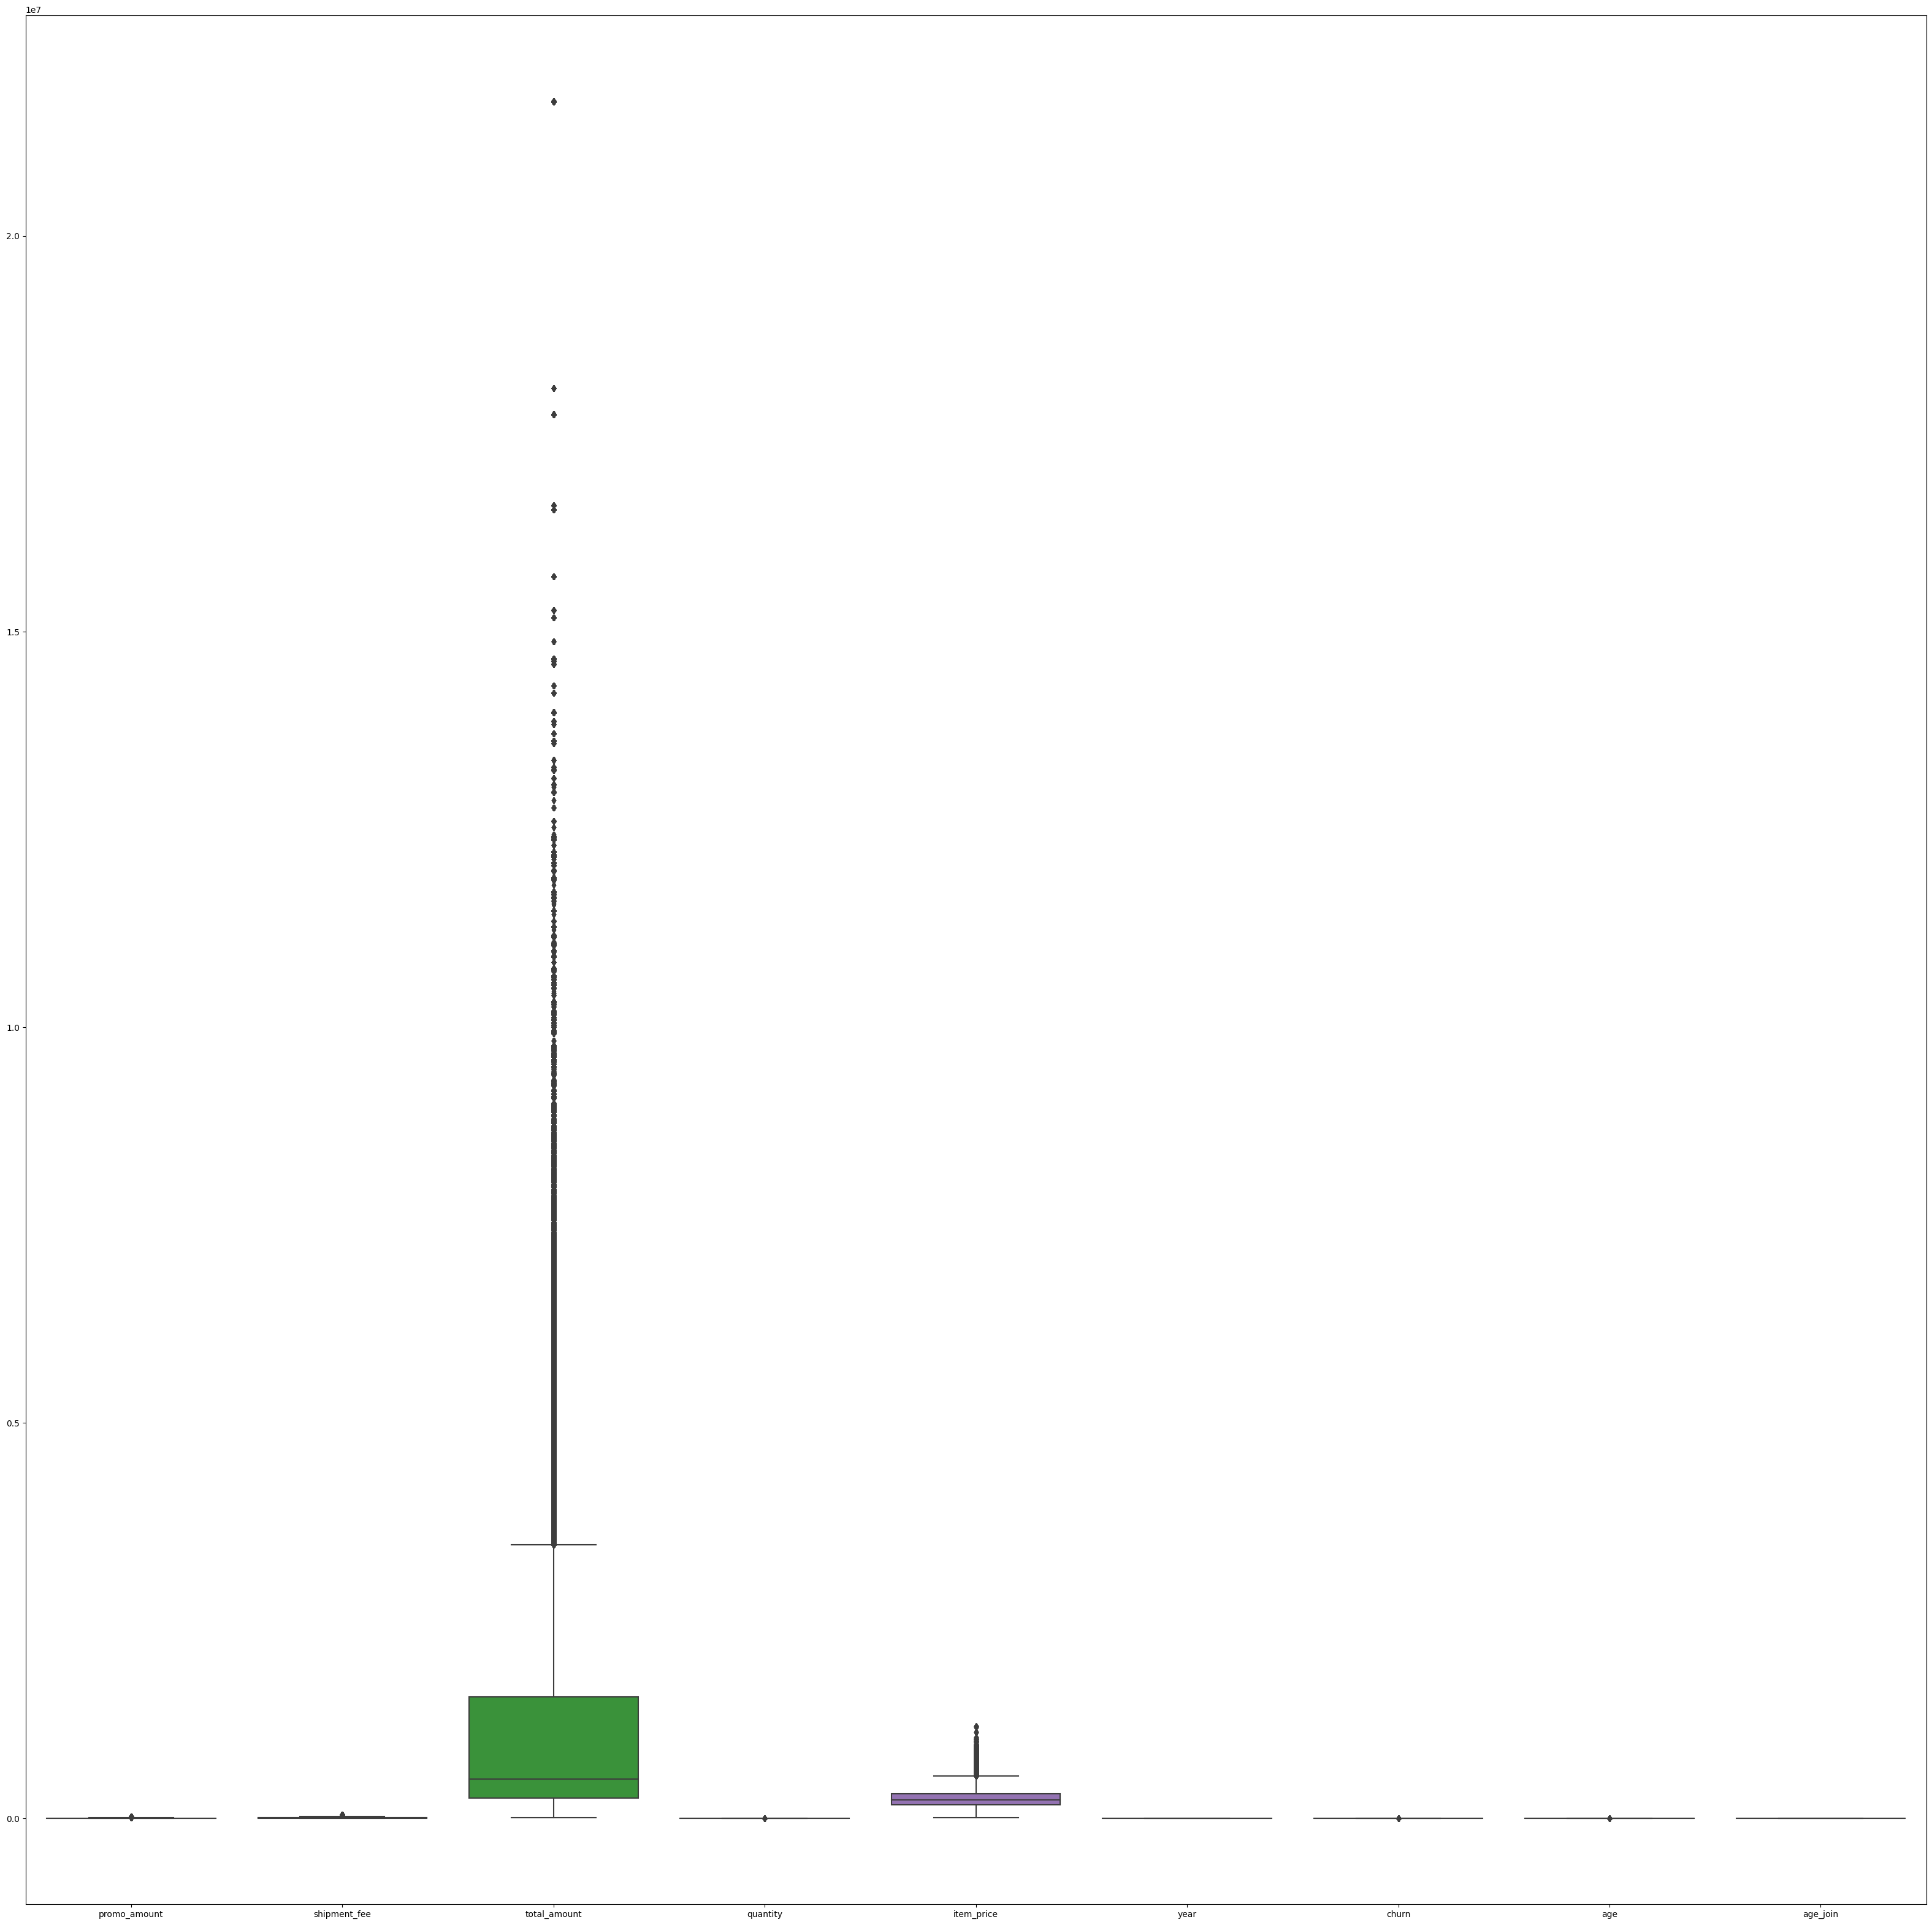

In [ ]:
# Menampilkan boxplot untuk mengecek outlier
fig, ax = plt.subplots(figsize=(40,40))
sns.boxplot(data=data)

Terdapat outlier pada kolom total_amount dan item_price, namun adanya outlier ini akan dianggap sebagai kewajaran




###Export Data

In [ ]:
#Copy data
df_bi = data.copy()
df_bi.head()

,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,gender_x,device_type,home_location,...,search_keywords,gender_y,masterCategory,season,year,usage,churn,age,age_join,provinsi
539,Credit Card,Success,0,tidak menggunakan promo code,10000,2021-09-05,2091956,F,Android,Sulawesi Selatan,...,tidak melakukan search,Men,Apparel,Fall,2011,Casual,1,27,5,Tengah
540,Credit Card,Success,0,tidak menggunakan promo code,10000,2021-09-05,2091956,F,Android,Sulawesi Selatan,...,tidak melakukan search,Men,Footwear,Summer,2012,Sports,1,27,5,Tengah
541,Credit Card,Success,0,tidak menggunakan promo code,10000,2021-09-05,2091956,F,Android,Sulawesi Selatan,...,tidak melakukan search,Men,Apparel,Fall,2011,Casual,1,27,5,Tengah
542,Credit Card,Success,0,tidak menggunakan promo code,10000,2021-09-05,2091956,F,Android,Sulawesi Selatan,...,tidak melakukan search,Men,Footwear,Summer,2012,Sports,1,27,5,Tengah
543,Credit Card,Success,0,tidak menggunakan promo code,10000,2021-09-05,2091956,F,Android,Sulawesi Selatan,...,tidak melakukan search,Men,Apparel,Fall,2011,Casual,1,27,5,Tengah


In [ ]:
# Export Clean Data
df_bi.to_csv('/content/drive/MyDrive/dataset/eiren_clean.csv', index=False)
df_bi.shape

(13893676, 34)

##Data Analysis & Visualizing

###Univariate Analysis

####Gender Customer

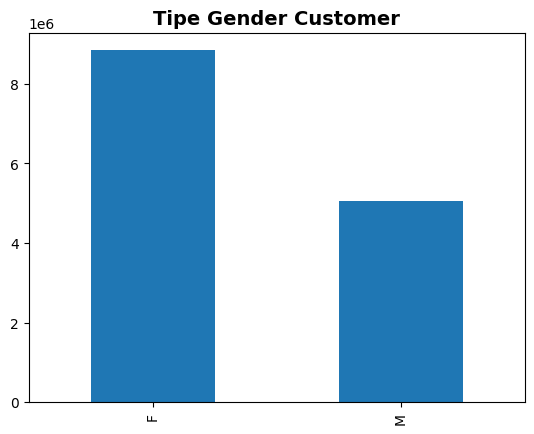

In [ ]:
# Jumlah setiap gender customer
plt.title("Tipe Gender Customer", fontsize=14, weight="bold")
df_bi["gender_x"].value_counts().plot.bar();

In [ ]:
# Jumlah setiap gender customer
df_bi["gender_x"].value_counts()

F    8842223
M    5051453
Name: gender_x, dtype: int64

Interpretasi : dari barplot, mayoritas customer adalah bergender perempuan dibandinkan laki-laki

####Lokasi Tempat Tinggal

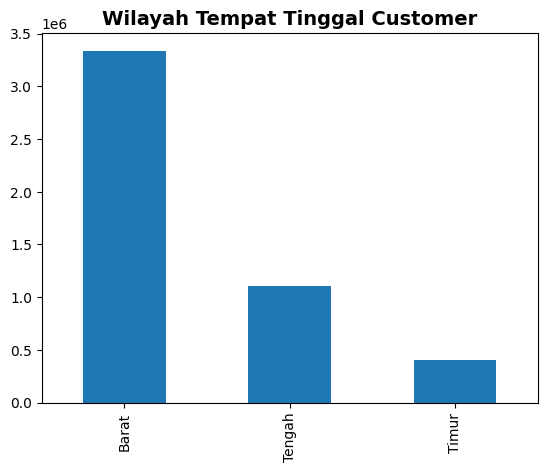

In [ ]:
# Jumlah wilayah tempat tinggal customer
plt.title("Wilayah Tempat Tinggal Customer", fontsize=14, weight="bold")
df_bi["provinsi"].value_counts().plot.bar();

In [ ]:
# Jumlah wilayah tempat tinggal customer
df_bi["provinsi"].value_counts()

Barat     3338290
Tengah    1102018
Timur      407780
Name: provinsi, dtype: int64

Interpretasi : mayoritas customer memiliki tempat tinggal pada wilayah Barat dibandingkan pada wilayah Tengah dan Timur

####Device Type

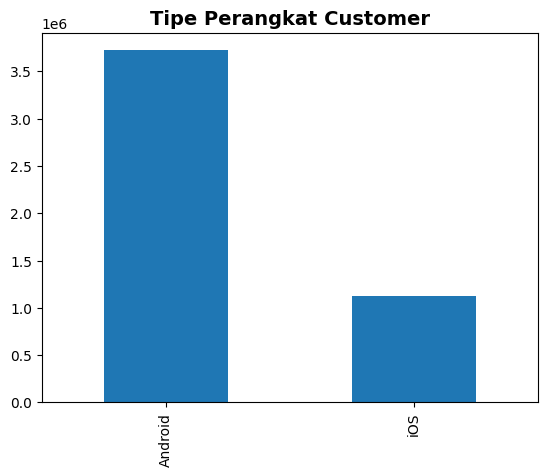

In [ ]:
# Jumlah tipe perangkat customer
plt.title("Tipe Perangkat Customer", fontsize=14, weight="bold")
df_bi["device_type"].value_counts().plot.bar();

In [ ]:
# Jumlah masing-masing tipe perangkat customer
df_bi["device_type"].value_counts()

Android    10693668
iOS         3200008
Name: device_type, dtype: int64

Interpretasi : Mayoritas customer memiliki device dengan tipe Android dibandingkan iOS

####Traffic Source

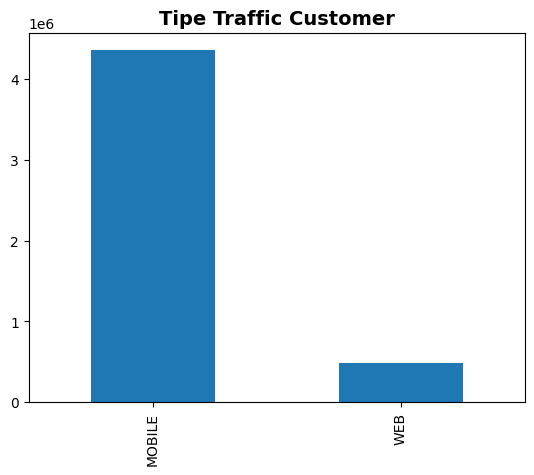

In [ ]:
# Jumlah tipe traffic customer
plt.title("Tipe Traffic Customer", fontsize=14, weight="bold")
df_bi["traffic_source"].value_counts().plot.bar();

In [ ]:
# Jumlah masing-masing tipe traffic customer
df_bi["traffic_source"].value_counts()

MOBILE    12497964
WEB        1395712
Name: traffic_source, dtype: int64

Interpretasi : Mayoritas customer mengakses layanan e-commerce menggunakan aplikasi berbasis mobile dibandingkan melalui aplikasi berbasis web

####Payment Method

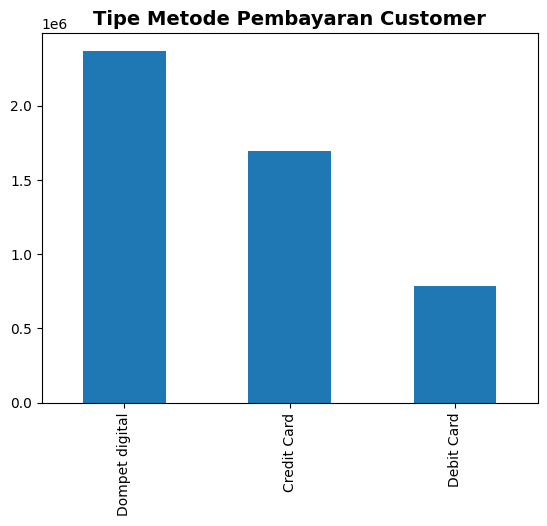

In [ ]:
# Jummlah metode pembayaran
plt.title("Tipe Metode Pembayaran Customer", fontsize=14, weight="bold")
df_bi["payment_method"].value_counts().plot.bar();

In [ ]:
# Jummlah maisng-masing metode pembayaran
df_bi["payment_method"].value_counts()

Dompet digital    2369370
Credit Card       1694828
Debit Card         783890
Name: payment_method, dtype: int64

Interpretasi : Mayoritas customer melakukan pembayaran menggunakan Dompet Digital dibandingkan menggunakan Credit Card dan Debit Card

#### Promo

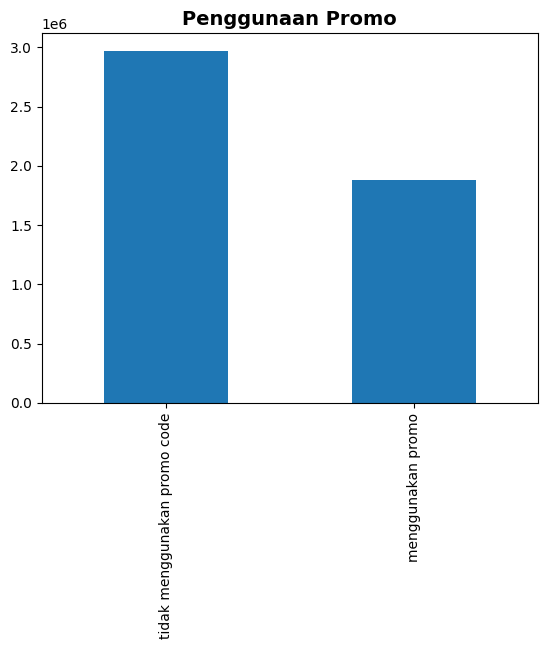

In [ ]:
# Jumlah penggunaan promo
plt.title("Penggunaan Promo", fontsize=14, weight="bold")
df_bi["promo_code"].value_counts().plot.bar();

In [ ]:
# Jumlah penggunaan promo
df_bi["promo_code"].value_counts()

tidak menggunakan promo code    2969058
menggunakan promo               1879030
Name: promo_code, dtype: int64

Interpretasi : Mayoritas customer melakukan transaksi pada e-commerce dengan tidak menambahkan code promo dibandingkan dengan menambahkan code promo untuk memperoleh potongan harga ketika melakukan transaksi

####Season Article

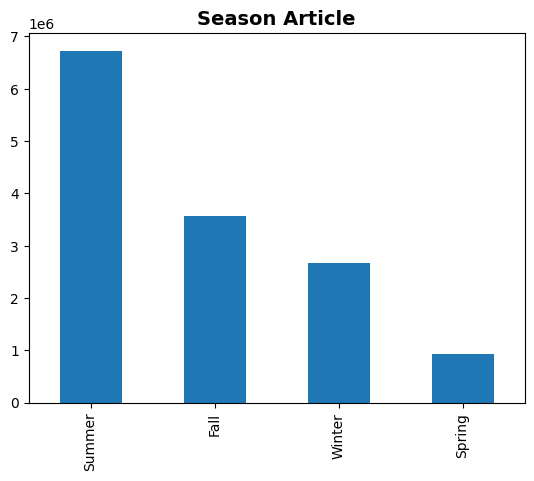

In [ ]:
# Jumlah jenis season article yang dibeli customer
plt.title("Season Article", fontsize=14, weight="bold")
df_bi["season"].value_counts().plot.bar();

In [ ]:
# Jumlah masing-masing jenis season article yang dibeli customer
df_bi["season"].value_counts()

Summer    6729839
Fall      3560021
Winter    2668960
Spring     934856
Name: season, dtype: int64

Interpretasi : Mayoritas customer melakukan transaksi pada product yang digunakan pada summer atau musim panas dengan jumlah yang signifikan dibandingkan pada product kedua yaitu product yang digunakan pada musim gugur

####Usage

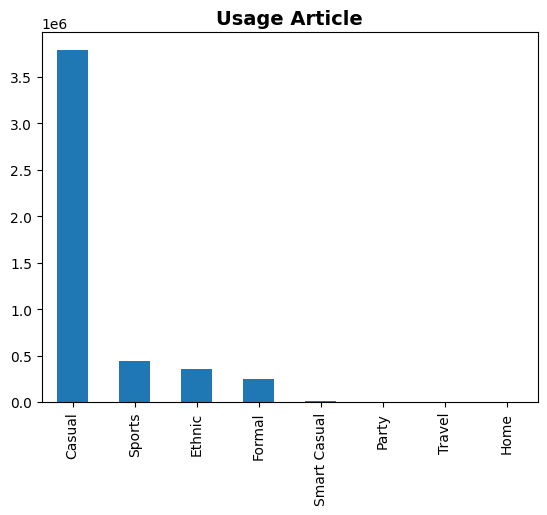

In [ ]:
# Jumlah usage article yang dibeli customer
plt.title("Usage Article", fontsize=14, weight="bold")
df_bi["usage"].value_counts().plot.bar();

In [ ]:
# Jumlah masing-masing usage article yang dibeli customer
df_bi["usage"].value_counts()

Casual          10866347
Sports           1257712
Ethnic           1006018
Formal            724423
Smart Casual       20569
Party               9803
Travel              8511
Home                 293
Name: usage, dtype: int64

Interpretasi : Mayoritas customer membeli product casual

####Gender Artikel

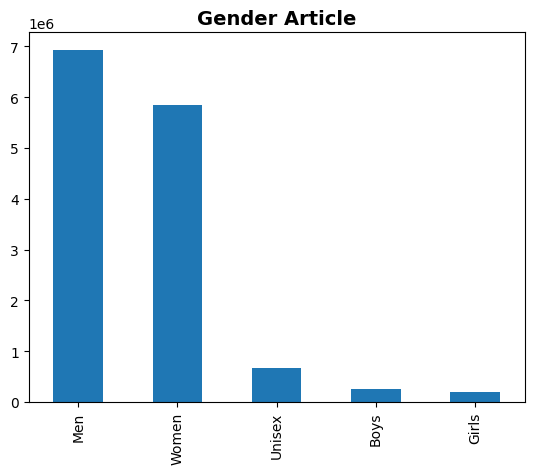

In [ ]:
# Jumlah jenis gender pada article yang dibeli customer
plt.title("Gender Article", fontsize=14, weight="bold")
df_bi["gender_y"].value_counts().plot.bar();

In [ ]:
# Jumlah jenis gender pada article yang dibeli customer
df_bi["gender_y"].value_counts()

Men       6926474
Women     5836089
Unisex     670018
Boys       258230
Girls      202865
Name: gender_y, dtype: int64

Interpretasi : Mayoritas customer membeli produk untuk laki-laki dewasa dan perempuan dewasa

####Search Keyword

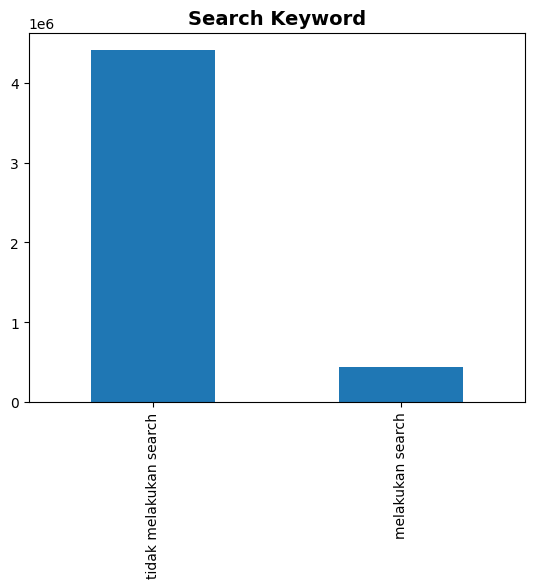

In [ ]:
# Jumlah kegiatan search customer
plt.title("Search Keyword", fontsize=14, weight="bold")
df_bi["search_keywords"].value_counts().plot.bar();

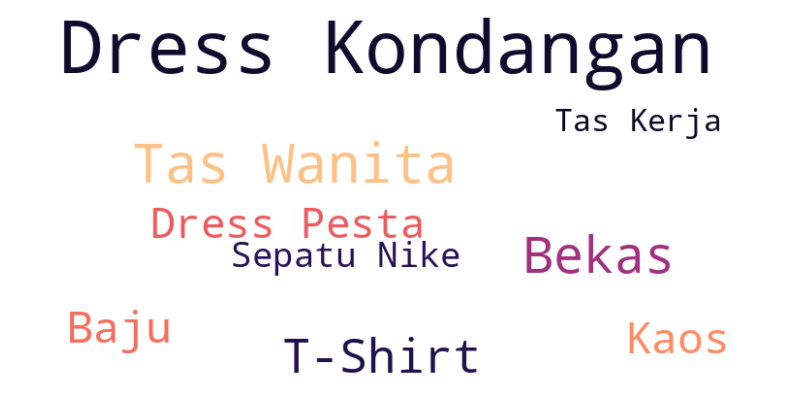

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menentukan batas minimum frekuensi yang lebih tinggi dari 41275
minimum_freq = 56352

# Filter word_freq untuk kata-kata yang memiliki frekuensi lebih besar dari minimum_freq
filtered_word_freq = {key: val for key, val in word_freq.items() if val >= minimum_freq}

# Membuat WordCloud dengan kata-kata yang difilter
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate_from_frequencies(filtered_word_freq)

# Plotting WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Jumlah kegiatan search custome
df["search_keywords"].value_counts()

Dress Kondangan    372983
Tas Wanita         187645
Bekas              162738
T-Shirt            145688
Kaos               121793
Baju               121163
Dress Pesta        112053
Sepatu Nike         74514
Tas Kerja           56352
Thrift              41275
Second Hand         41082
Second              40961
Barang Bekas        40538
Celana Panjang      40528
Sepatu              40423
Sepatu Adidas       37338
Sendal              18258
Celana              17063
T-shirt             10302
Jam                 10227
Topi                 7079
Baju Tidur           3228
Daster               1747
Name: search_keywords, dtype: int64

###Bivariate Analysis

####Churn Berdasarkan Gender

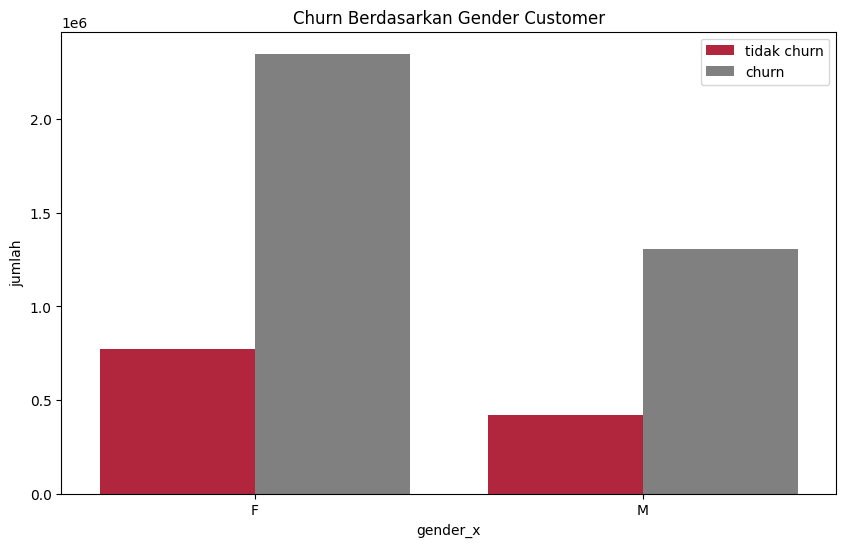

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender_x', hue='churn', data=df_bi, palette=['#C80F2E', 'grey'])
plt.title('Churn Berdasarkan Gender Customer')
plt.ylabel('jumlah')
plt.xticks(rotation=0)
plt.legend(['tidak churn', 'churn'])
plt.show()

Interpretasi: dari grafik atas, diketahui bahwa mayoritas customer churn. Mayoritas customer yang terindikasi churn adalah perempuan

In [ ]:
# Menghitung jumlah data churn dan non-churn berdasarkan gender
churn_by_gender = df_bi.groupby(['gender_x', 'churn']).size().reset_index(name='jumlah')

# Menampilkan hasil
print(churn_by_gender)


  gender_x  churn   jumlah
0        F      0   771813
1        F      1  2350018
2        M      0   417424
3        M      1  1308833


####Churn Berdasarkan Tempat Tinggal

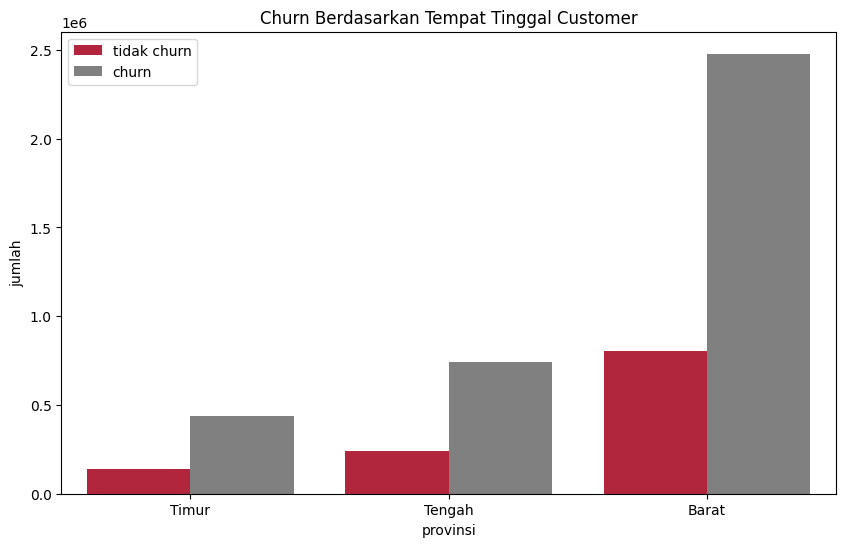

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='provinsi', hue='churn', data=df_bi, palette=['#C80F2E', 'grey'])
plt.title('Churn Berdasarkan Tempat Tinggal Customer')
plt.ylabel('jumlah')
plt.xticks(rotation=0)
plt.legend(['tidak churn', 'churn'])
plt.show()

Interpretasi : dari grafik di atas, dapat disimpulkan bahwa mayoritas customer berasal dari Barat memiliki tingkat churn yang tinggi. Diketahui juga mayoritas customer memiliki tempat tinggal di wilayah Barat

In [ ]:
# Menghitung jumlah data churn dan non-churn berdasarkan provinsi
churn_by_province = df_bi.groupby(['provinsi', 'churn']).size().reset_index(name='jumlah')

# Menampilkan hasil
print(churn_by_province)


  provinsi  churn   jumlah
0    Barat      0   820866
1    Barat      1  2517424
2   Tengah      0   271626
3   Tengah      1   830392
4    Timur      0    96745
5    Timur      1   311035


####Churn Berdasarkan Metode Pembayaran

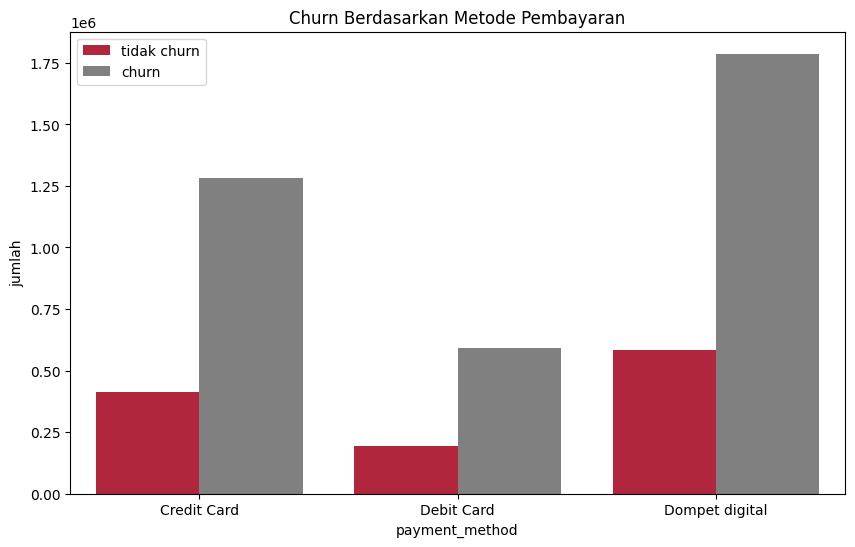

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_method', hue='churn', data=df_bi, palette=['#C80F2E', 'grey'])
plt.title('Churn Berdasarkan Metode Pembayaran')
plt.ylabel('jumlah')
plt.xticks(rotation=0)
plt.legend(['tidak churn', 'churn'])
plt.show()

Interpretasi : Mayoritas customer yang menggunakan dompet digital sebagai metode pembayaran lebih banyak yang mengalami churn.

In [ ]:
# Menghitung jumlah data churn dan non-churn berdasarkan metode pembayaran
churn_by_payment_method = df_bi.groupby(['payment_method', 'churn']).size().reset_index(name='jumlah')

# Menampilkan hasil
print(churn_by_payment_method)


   payment_method  churn   jumlah
0     Credit Card      0   413171
1     Credit Card      1  1281657
2      Debit Card      0   194179
3      Debit Card      1   589711
4  Dompet digital      0   581887
5  Dompet digital      1  1787483


#### Churn Berdasarkan Penggunaan Promo

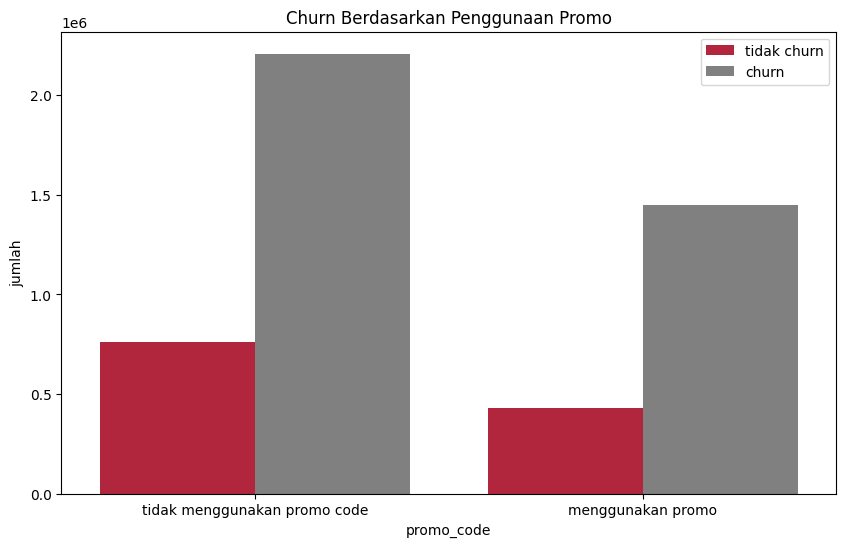

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='promo_code', hue='churn', data=df_bi, palette=['#C80F2E', 'grey'])
plt.title('Churn Berdasarkan Penggunaan Promo')
plt.ylabel('jumlah')
plt.xticks(rotation=0)
plt.legend(['tidak churn', 'churn'])
plt.show()

Interpretasi : Mayoritas customer yang menggunakan tidak menggunakan promo untuk bertransaksi lebih banyak yang mengalami churn.

In [ ]:
# Menghitung jumlah data churn dan non-churn berdasarkan metode pembayaran
churn_by_promo = df_bi.groupby(['promo_code', 'churn']).size().reset_index(name='jumlah')

# Menampilkan hasil
print(churn_by_promo)

                     promo_code  churn   jumlah
0             menggunakan promo      0   428474
1             menggunakan promo      1  1450556
2  tidak menggunakan promo code      0   760763
3  tidak menggunakan promo code      1  2208295


####Churn Berdasarkan Search Keyword

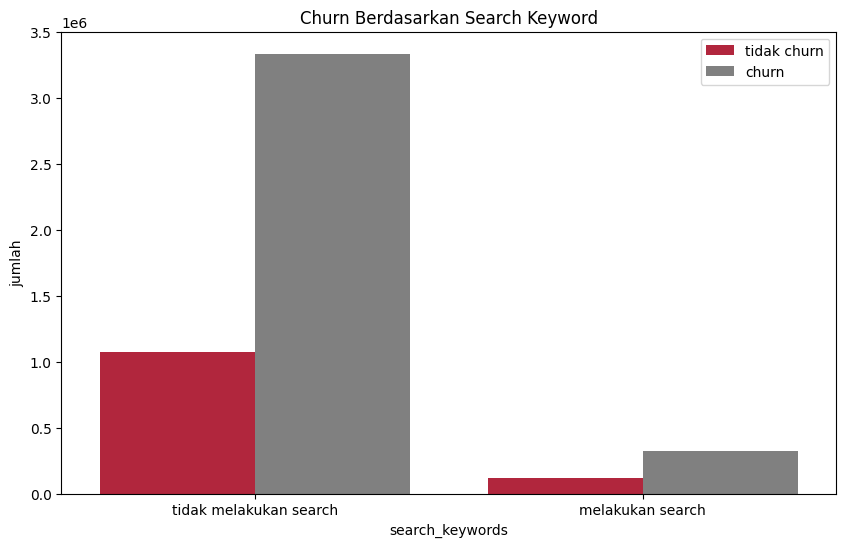

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='search_keywords', hue='churn', data=df_bi, palette=['#C80F2E', 'grey'])
plt.title('Churn Berdasarkan Search Keyword')
plt.ylabel('jumlah')
plt.xticks(rotation=0)
plt.legend(['tidak churn', 'churn'])
plt.show()

Interpretasi : Mayoritas customer yang tidak melakukan pencarian produk lebih banyak yang mengalami churn secara signifikan dibandikan tidak churn.

In [ ]:
# Menghitung jumlah data churn dan non-churn berdasarkan keyword pencarian
churn_by_search_keywords = df_bi.groupby(['search_keywords', 'churn']).size().reset_index(name='jumlah')

# Menampilkan hasil
print(churn_by_search_keywords)


          search_keywords  churn   jumlah
0        melakukan search      0   116096
1        melakukan search      1   324821
2  tidak melakukan search      0  1073141
3  tidak melakukan search      1  3334030


####Churn Berdasarkan Status Pembayaran

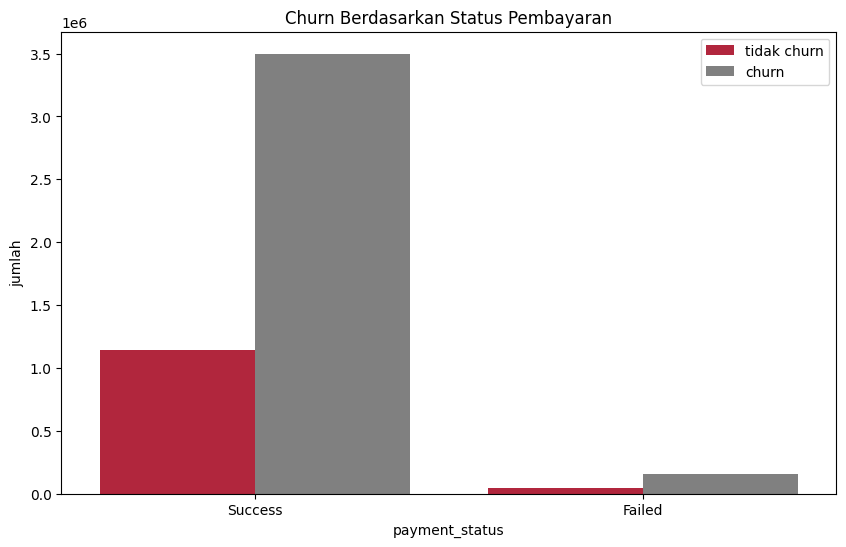

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_status', hue='churn', data=df_bi, palette=['#C80F2E', 'grey'])
plt.title('Churn Berdasarkan Status Pembayaran')
plt.ylabel('jumlah')
plt.xticks(rotation=0)
plt.legend(['tidak churn', 'churn'])
plt.show()

Interpretasi : Mayoritas customer mengalami pembayaran yang berhasil dibandingkan tidak berhasil secara signifikan. Customer yang mengalami pembayaran berhasil memiliki jumlah churn paling banyak.

In [ ]:
# Menghitung jumlah data churn dan non-churn berdasarkan status pembayaran
churn_by_payment_status = df_bi.groupby(['payment_status', 'churn']).size().reset_index(name='jumlah')

# Menampilkan hasil
print(churn_by_payment_status)


  payment_status  churn   jumlah
0         Failed      0    48789
1         Failed      1   159923
2        Success      0  1140448
3        Success      1  3498928


# **Modelling**

Untuk meminimalisir tingkat error, maka bagian modeling dan evaluation dikerjakan pada notebook ini

https://colab.research.google.com/drive/1ZwA95vF9BKZZrvJi6qIuDqKFIVzLH5Dw?usp=sharing